# Programming Quiz - Part 1


In [1]:
# Essential Imports
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
# Import the data
dataset = pd.read_csv('./ProgrammingQuiz_Dataset.csv')

Problem 1 - Exploratory Analysis

### a) Print the overall statistical description of the data and plot standard statistical distributions for each variable.  
Comment: Which variable has the most “Normal” looking distribution? Which variable has the maximum outliers?

In [3]:
dataset.head()

,Height,Weight,Diameter,Length
0,0.135,0.6770,0.420,0.530
1,0.150,0.7775,0.415,0.530
2,0.125,0.7680,0.425,0.545
3,0.150,0.8945,0.440,0.550
4,0.140,0.6065,0.380,0.525


In [4]:
print("Data type : ", type(dataset))
print("Data dims : ", dataset.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (4000, 4)


In [5]:
# dataset.describe()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Height    4000 non-null   float64
 1   Weight    4000 non-null   float64
 2   Diameter  4000 non-null   float64
 3   Length    4000 non-null   float64
dtypes: float64(4)
memory usage: 125.1 KB


<AxesSubplot:>

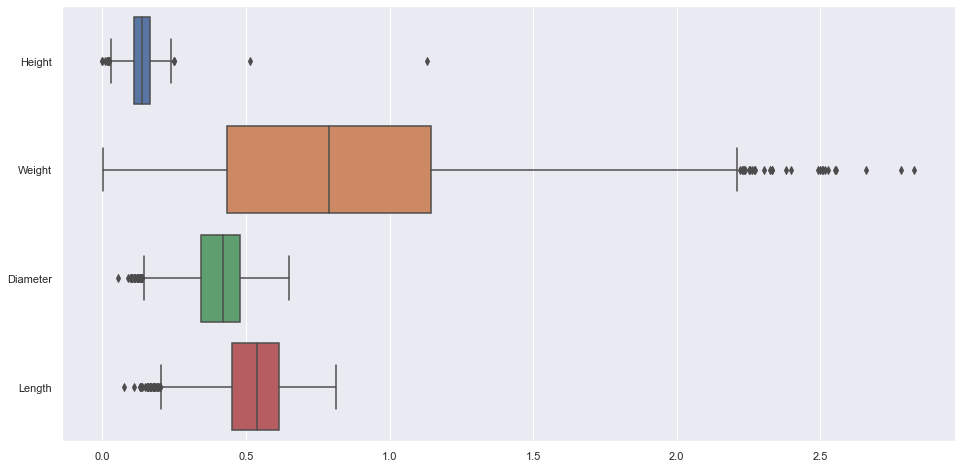

In [6]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = dataset, orient = "h")

<AxesSubplot:ylabel='Count'>

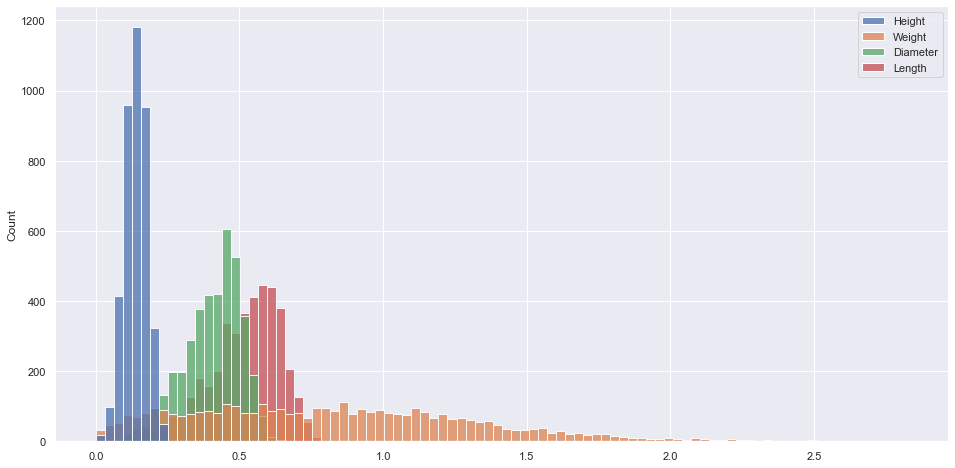

In [7]:
# Draw the histplot of all vars
f = plt.figure(figsize=(16, 8))
sb.histplot(data = dataset)

<AxesSubplot:>

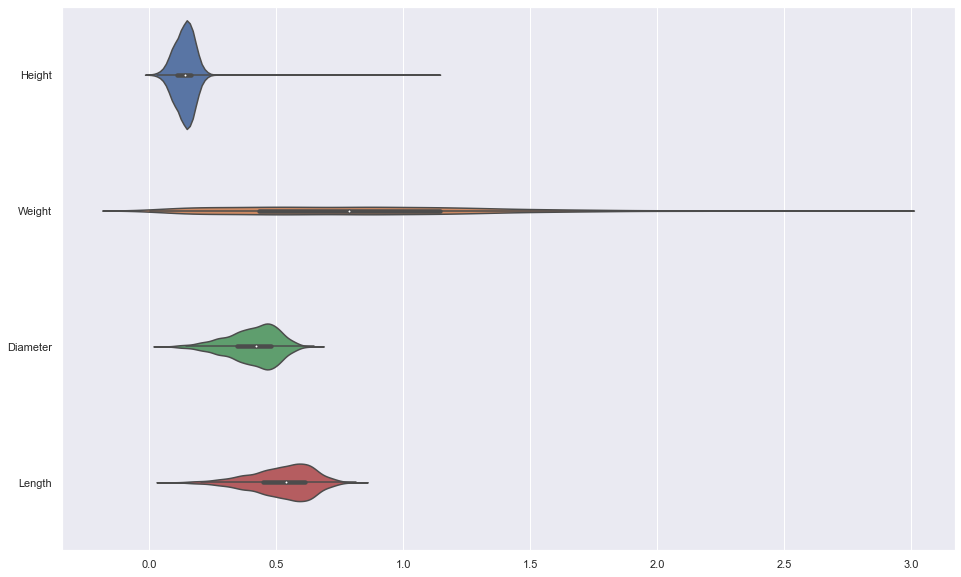

In [8]:
# Draw the violin plot of all vars
f = plt.figure(figsize=(16, 10))
sb.violinplot(data = dataset, orient = "h")

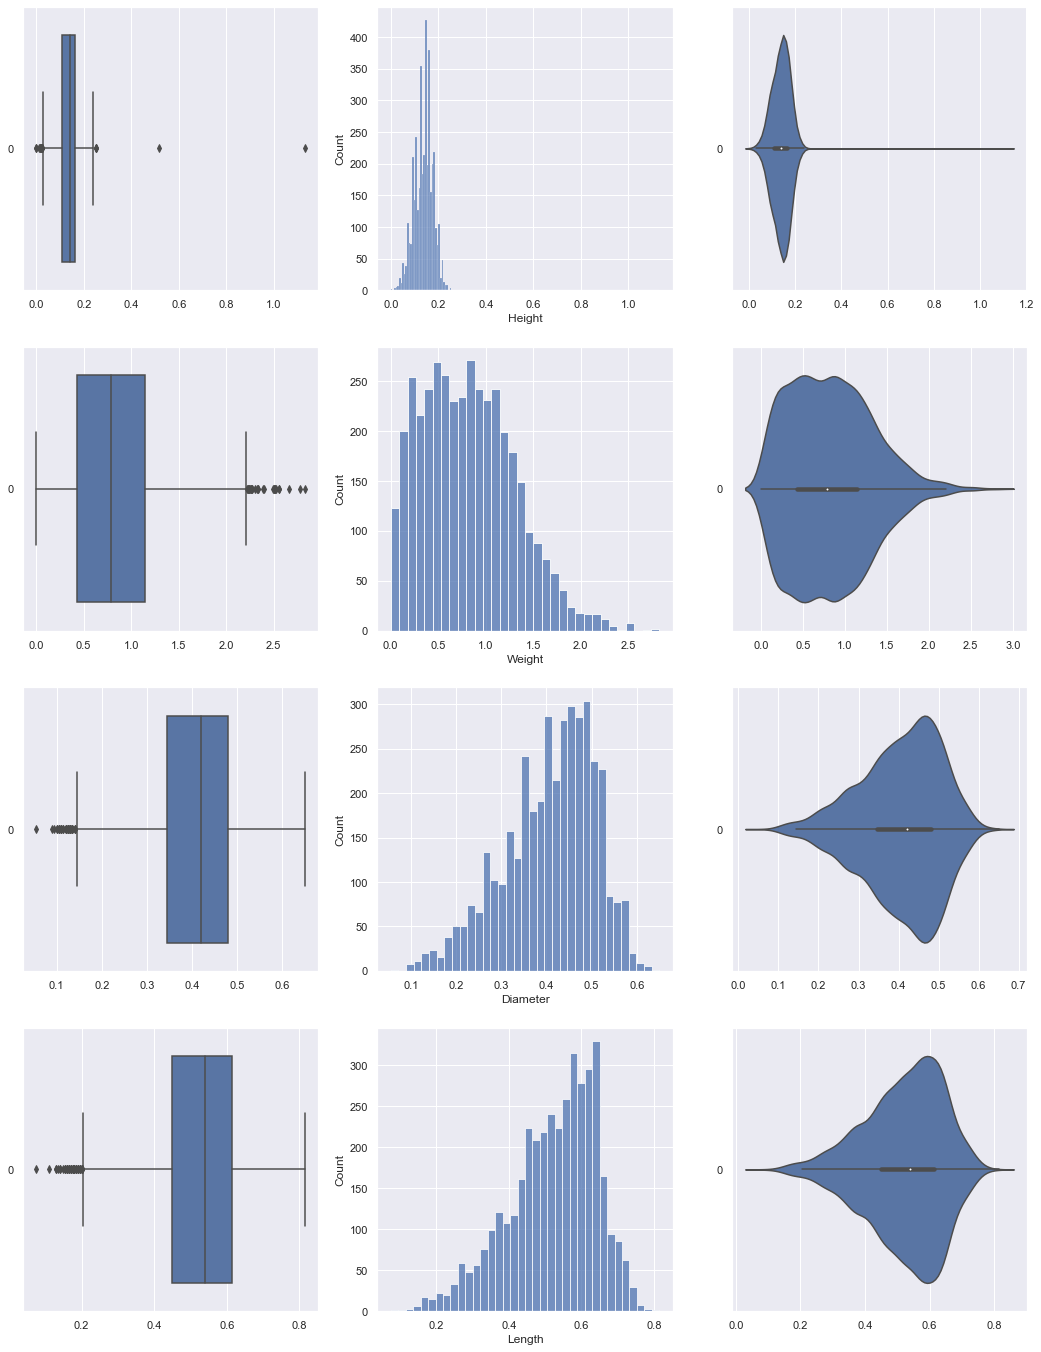

In [9]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in dataset:
    sb.boxplot(data = dataset[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = dataset[var], ax = axes[count,1])
    sb.violinplot(data = dataset[var], orient = "h", ax = axes[count,2])
    count += 1

#### Comments
Height is the most normal looking distribution, as seen in the histplot above
Weight has the most outliers, as seen in the boxplot

### (b) Print the mutual correlation amongst all the variables using a correlation heatmap. 
Comment : Which variable has the highest absolute correlation with Length? Is such a strong correlation helpful in predicting Length?

<AxesSubplot:>

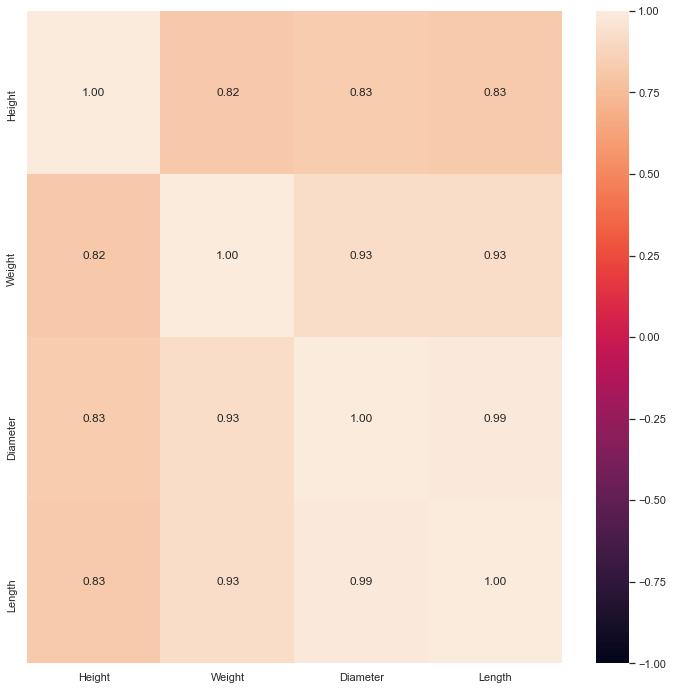

In [11]:
# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(12, 12))
sb.heatmap(dataset.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

#### Comments
Diameter has the highest correlation with Length, at 0.99
Yes, such a strong correlation will be very useful when we predict Length.

## Problem 2 - Uni-variate Linear Regression

### a) Partition the dataset randomly into Train and Test datasets – 70% for Train and 30% for Test. On the Train set, fit three uni-variate Linear Regression models for Length against each of the three other variables. For each such linear model, print the coefficients of the model you fit, and plot the regression line on a scatterplot.

In [12]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(
    dataset, test_size=0.3, random_state=42)

dataset_train.describe()

,Height,Weight,Diameter,Length
count,2800.000000,2800.000000,2800.000000,2800.000000
mean,0.138868,0.820019,0.406175,0.522071
std,0.043706,0.491786,0.099716,0.120767
min,0.000000,0.002000,0.055000,0.075000
25%,0.110000,0.429250,0.345000,0.450000
50%,0.140000,0.792000,0.420000,0.540000
75%,0.165000,1.142375,0.480000,0.610000
max,1.130000,2.825500,0.650000,0.815000


In [13]:
dataset_test.describe()

,Height,Weight,Diameter,Length
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.138888,0.818698,0.405908,0.521029
std,0.038077,0.483990,0.099600,0.120240
min,0.025000,0.014000,0.105000,0.135000
25%,0.115000,0.438500,0.345000,0.450000
50%,0.140000,0.774750,0.420000,0.535000
75%,0.165000,1.150625,0.485000,0.615000
max,0.240000,2.555000,0.630000,0.800000


<AxesSubplot:>

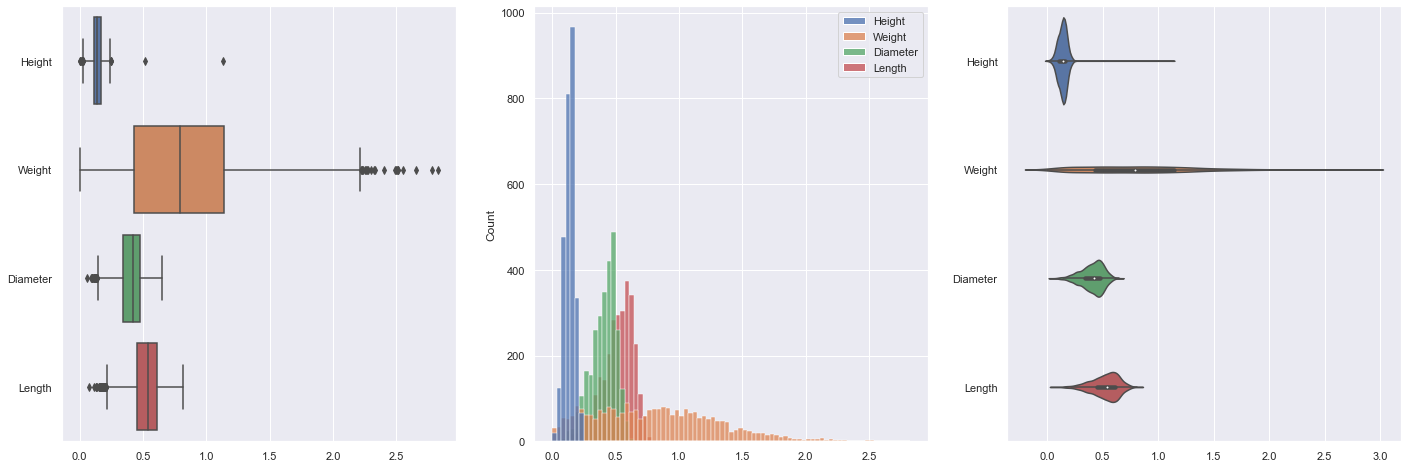

In [14]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 8))
sb.boxplot(data = dataset_train, orient = "h", ax = axes[0])
sb.histplot(data = dataset_train, ax = axes[1])
sb.violinplot(data = dataset_train, orient = "h", ax = axes[2])

In [88]:
from sklearn.linear_model import LinearRegression
linreg_height = LinearRegression()
linreg_weight = LinearRegression()
linreg_diameter = LinearRegression()

length_train = dataset_train[["Length"]]
height_train = dataset_train[["Height"]]
weight_train = dataset_train[["Weight"]]
diameter_train = dataset_train[["Diameter"]]

length_test = dataset_test[["Length"]]
height_test = dataset_test[["Height"]]
weight_test = dataset_test[["Weight"]]
diameter_test = dataset_test[["Diameter"]]

print("~Linregs - Train")
print("Length vs Height:")
linreg_height.fit(height_train, length_train)
print('Intercept \t: b = ', linreg_height.intercept_)
print('Coefficients \t: a = ', linreg_height.coef_)
print()
print("Length vs Weight:")
linreg_weight.fit(weight_train, length_train)
print('Intercept \t: b = ', linreg_weight.intercept_)
print('Coefficients \t: a = ', linreg_weight.coef_)
print()
print("Length vs Diameter:")
linreg_diameter.fit(diameter_train, length_train)
print('Intercept \t: b = ', linreg_diameter.intercept_)
print('Coefficients \t: a = ', linreg_diameter.coef_)


~Linregs - Train
Length vs Height:
Intercept 	: b =  [0.21440433]
Coefficients 	: a =  [[2.21553861]]

Length vs Weight:
Intercept 	: b =  [0.33563922]
Coefficients 	: a =  [[0.2273512]]

Length vs Diameter:
Intercept 	: b =  [0.03643327]
Coefficients 	: a =  [[1.19563774]]


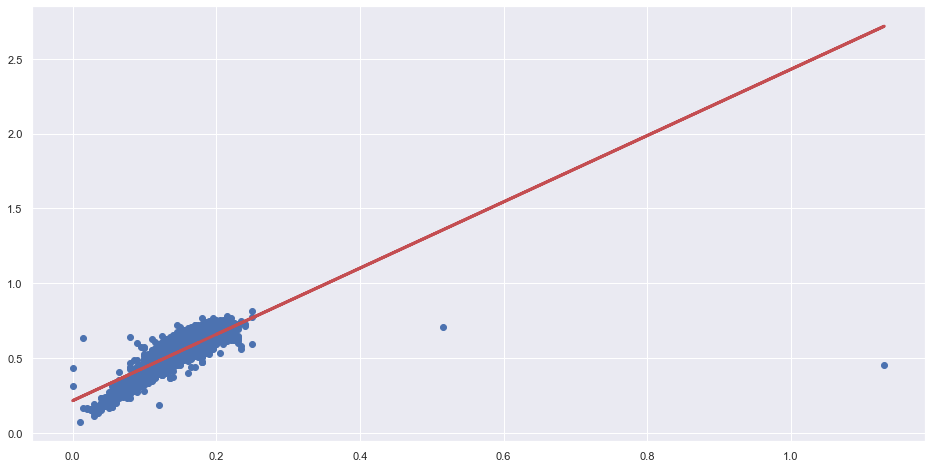

Length vs Height:
Intercept 	: b =  [0.21440433]
Coefficients 	: a =  [[2.21553861]]


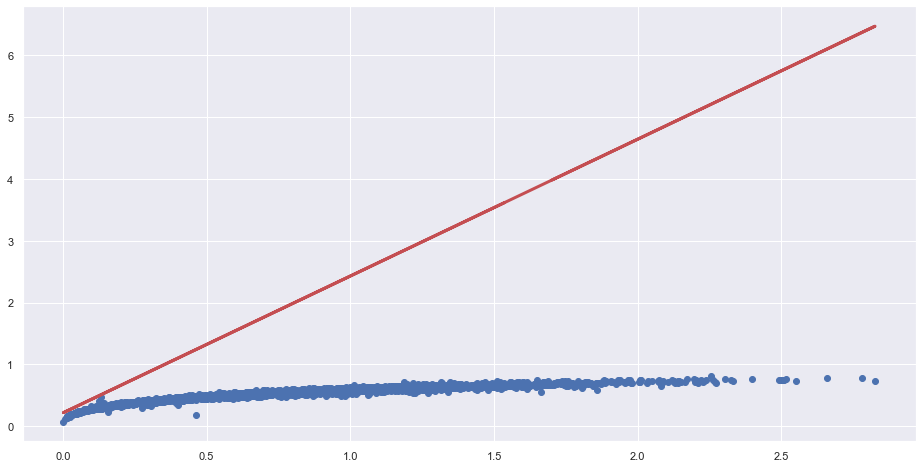

Length vs Height:
Intercept 	: b =  [0.33563922]
Coefficients 	: a =  [[0.2273512]]


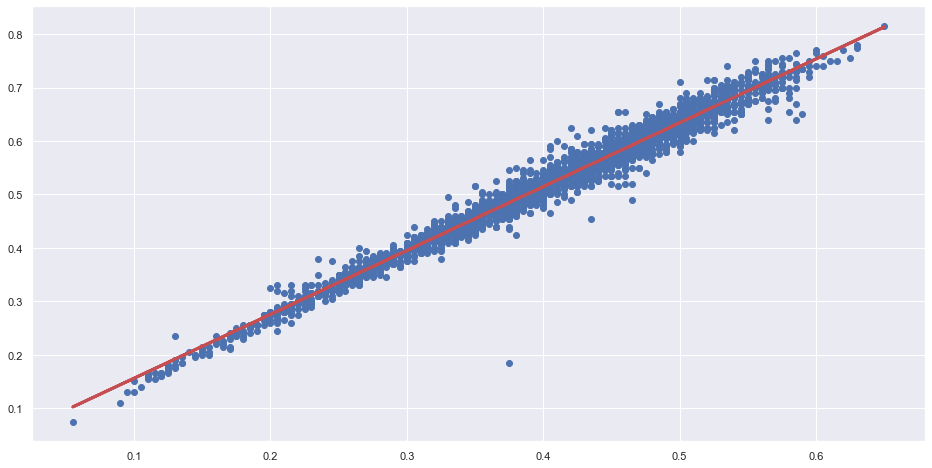

Length vs Height:
Intercept 	: b =  [0.03643327]
Coefficients 	: a =  [[1.19563774]]


In [87]:
plots = [
    ['height', height_train, linreg_height],
    ['weight', weight_train, linreg_weight],
    ['diameter', diameter_train, linreg_diameter]
]

target_train = length_train

for plot in plots:
    var_name = plot[0]
    var_train = plot[1]
    linreg = plot[2]
    
    # Formula for the Regression line
    regline_x = var_train
    regline_y = linreg.intercept_ + linreg.coef_ * var_train

    # Plot the Linear Regression line
    f = plt.figure(figsize=(16, 8))
    plt.scatter(var_train, target_train)
    plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
    plt.show()

    print("Length vs Height:")
    linreg.fit(var_train, target_train)
    print('Intercept \t: b = ', linreg.intercept_)
    print('Coefficients \t: a = ', linreg.coef_)

### (b) Predict Length using each of the three models on both Train and Test datasets. Plot the actual values of Length against the predicted values of Length in each case. 
Print the Mean Squared Errors and R^2 values in each case.

In [47]:
length_train_pred_from_height = linreg_height.predict(height_train)
length_train_pred_from_weight = linreg_weight.predict(weight_train)
length_train_pred_from_diameter = linreg_diameter.predict(diameter_train)

length_test_pred_from_height = linreg_height.predict(height_test)
length_test_pred_from_weight = linreg_weight.predict(weight_test)
length_test_pred_from_diameter = linreg_diameter.predict(diameter_test)


~~ Length vs height TRAIN ~~


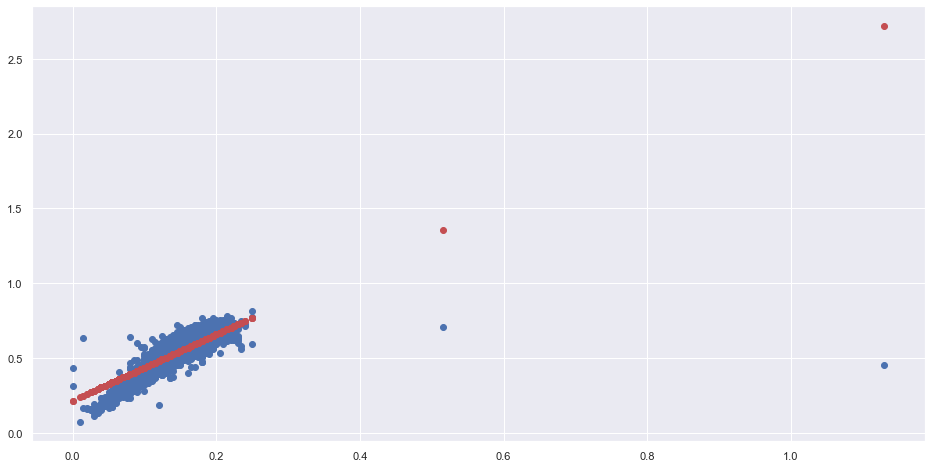

Explained Variance (R^2) 	: 0.6429117756637175
Mean Squared Error (MSE) 	: 0.0052061850745584405
Root Mean Squared Error (RMSE) 	: 0.07215389854026212

~~ Length vs height TEST ~~


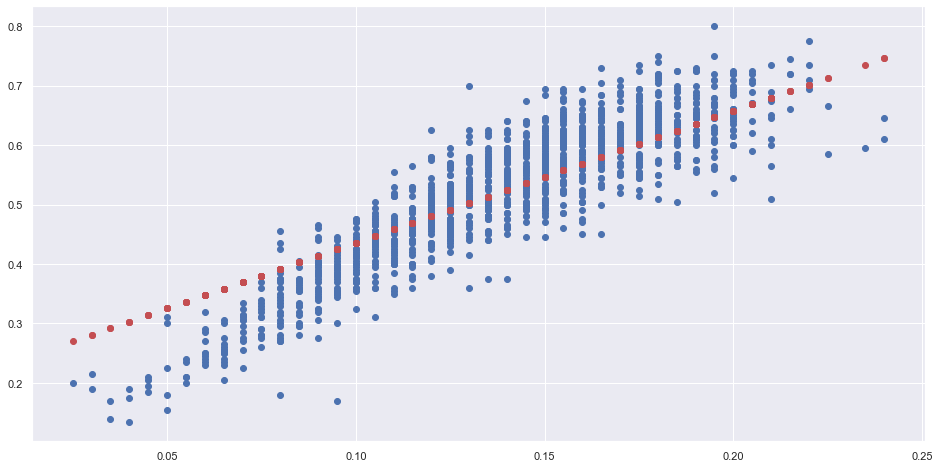

Explained Variance (R^2) 	: 0.7642363017582088
Mean Squared Error (MSE) 	: 0.0034057744021748037
Root Mean Squared Error (RMSE) 	: 0.05835901303290524

~~ Length vs weight TRAIN ~~


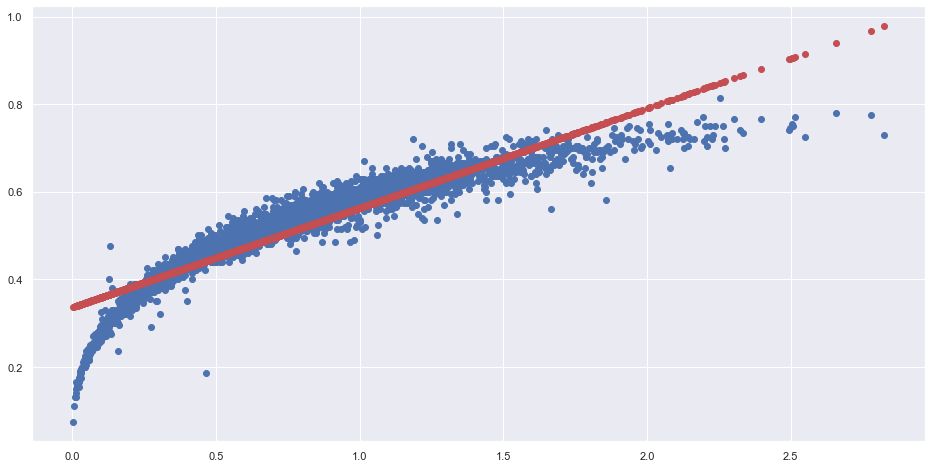

Explained Variance (R^2) 	: 0.8571315215951556
Mean Squared Error (MSE) 	: 0.002082957905651107
Root Mean Squared Error (RMSE) 	: 0.04563943366926355

~~ Length vs weight TEST ~~


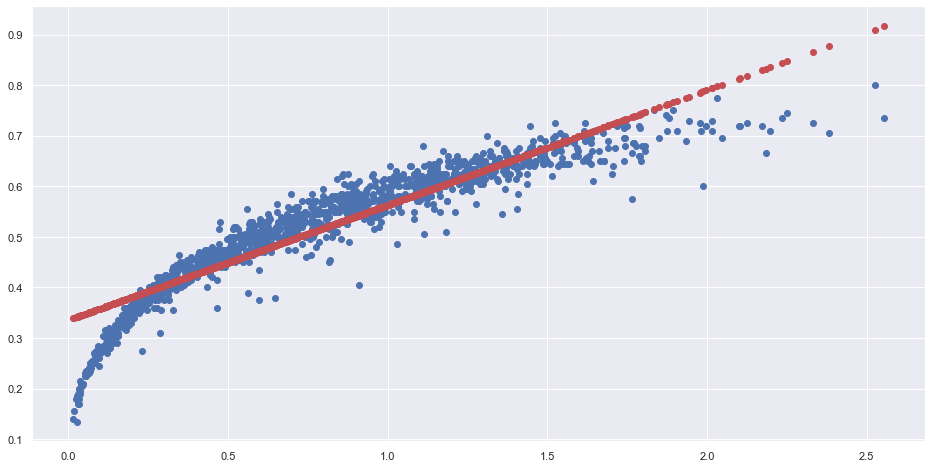

Explained Variance (R^2) 	: 0.8544733160093801
Mean Squared Error (MSE) 	: 0.0021022365142081057
Root Mean Squared Error (RMSE) 	: 0.0458501528264422

~~ Length vs diameter TRAIN ~~


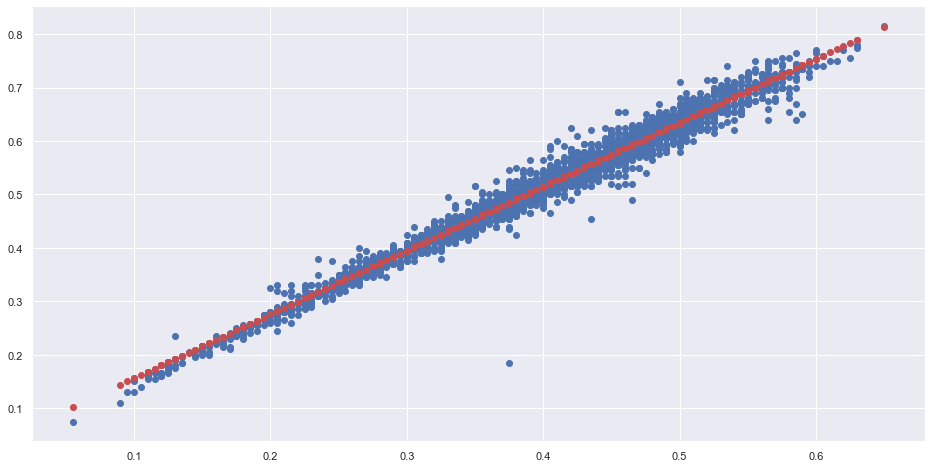

Explained Variance (R^2) 	: 0.9746001483820724
Mean Squared Error (MSE) 	: 0.00037031836777883165
Root Mean Squared Error (RMSE) 	: 0.019243657858599328

~~ Length vs diameter TEST ~~


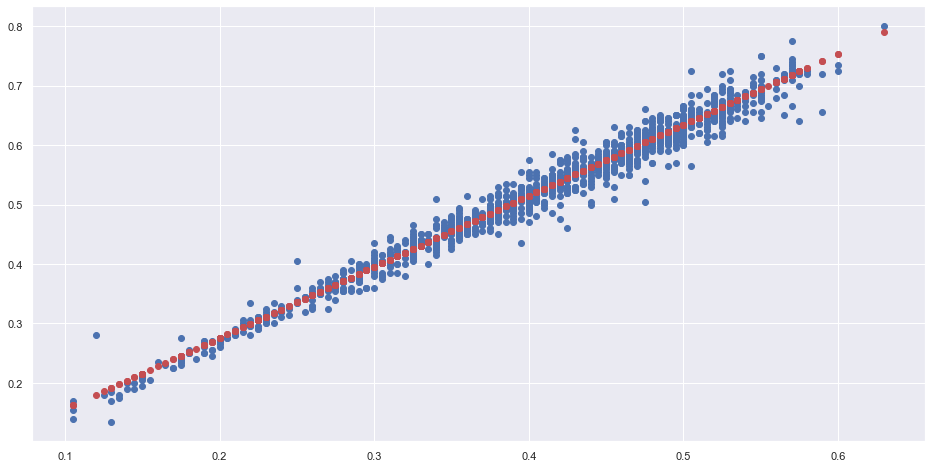

Explained Variance (R^2) 	: 0.9734942189830013
Mean Squared Error (MSE) 	: 0.0003828948696112015
Root Mean Squared Error (RMSE) 	: 0.019567699650475053


In [74]:
from sklearn.metrics import mean_squared_error

# var_name, var_train, var_test, train_pred, test_pred
models = [
    ['height', height_train, height_test, linreg_height, length_train_pred_from_height, length_test_pred_from_height],
    ['weight', weight_train, weight_test, linreg_weight, length_train_pred_from_weight, length_test_pred_from_weight],
    ['diameter', diameter_train, diameter_test, linreg_diameter, length_train_pred_from_diameter, length_test_pred_from_diameter],
    
]

for model in models:
    var_name = model[0]
    var_train = model[1]
    var_test = model[2]
    linreg = model[3]
    train_pred = model[4]
    test_pred = model[5]
    
    print()
    print("~~ Length vs " + var_name + " TRAIN ~~")
    
    # Plot the Linear Regression line based on Var Train
    f = plt.figure(figsize=(16, 8))
    plt.scatter(var_train, length_train)
    plt.scatter(var_train, train_pred, color = "r")
    plt.show()
    
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(var_train, length_train))

    # Mean Squared Error (MSE)
    mse = mean_squared_error(length_train, train_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
    
    print()
    print("~~ Length vs " + var_name + " TEST ~~")
    
    # Plot the Linear Regression line based on Var Test
    f = plt.figure(figsize=(16, 8))
    plt.scatter(var_test, length_test)
    plt.scatter(var_test, test_pred, color = "r")
    plt.show()
    
    # Explained Variance (R^2)
    print("Explained Variance (R^2) \t:", linreg.score(var_test, length_test))

    # Mean Squared Error (MSE)
    mse = mean_squared_error(length_test, test_pred)
    print("Mean Squared Error (MSE) \t:", mse)
    print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


#### (c) Comment : Which of the three uni-variate linear models is the best in terms of predicting Length? Briefly justify.
Length vs Diameter has the greatest R^2 with both train and test data.
Length vs Diameter has the lowest MSE and RMSE with both train and test data.

Therefore Length vs Diameter is the best uni-variate model!

## Problem 3 - Multi-Variate Linear Regression

### (a) Partition the dataset randomly into Train and Test datasets – 70% for Train and 30% for Test. 
On the Train set, fit a single multi-variate Linear Regression model for Length against all of the three other variables.

In [82]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Import the required function from sklearn
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(dataset['Length'])
X = pd.DataFrame(dataset[['Height','Weight','Diameter']]) # our single multi-variate model data!

# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(X_train, y_train)

Train Set : (2800, 3) (2800, 1)
Test Set  : (1200, 3) (1200, 1)


LinearRegression()

### (b) Predict Length using this model on both Train and Test datasets. Print the Mean Squared Error and R^2 values.

In [79]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [0.05860898]
Coefficients 	: a =  [[0.03039854 0.02058463 1.08836242]]


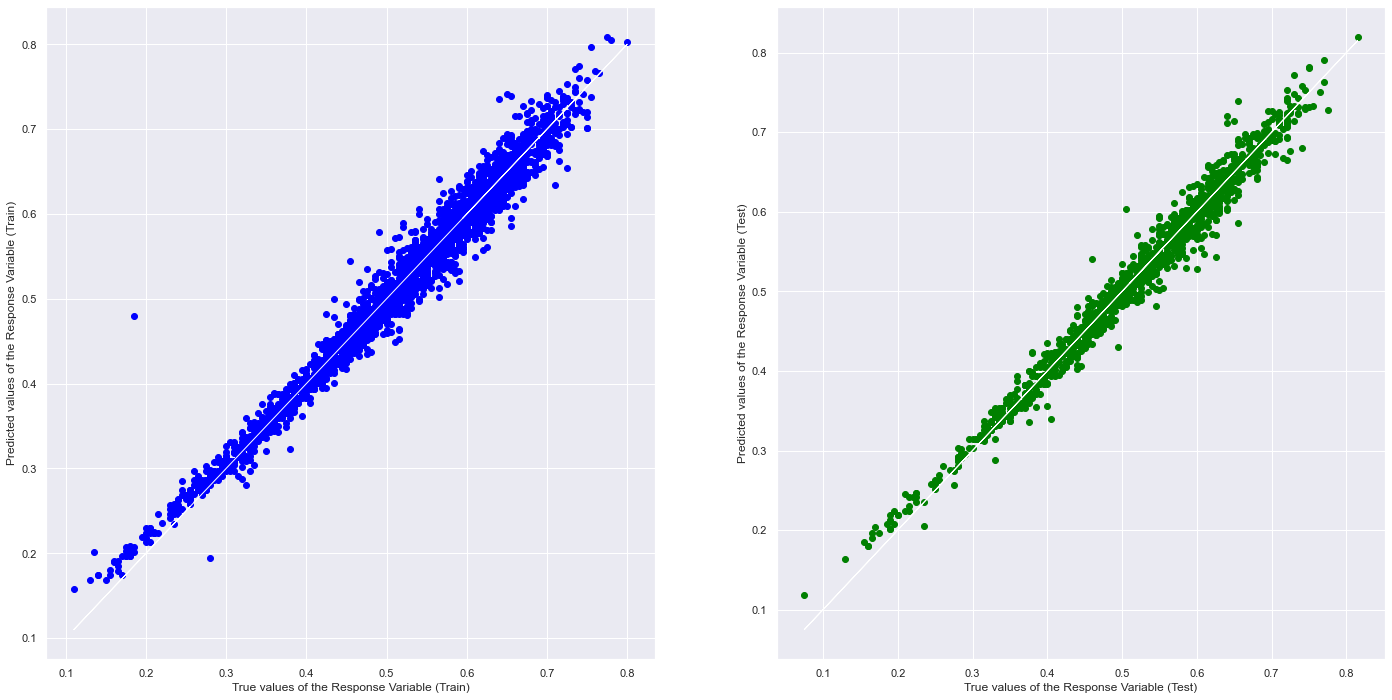

In [80]:
# Predict SalePrice values corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [81]:
print("Explained Variance (R^2) on Train Set \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) on Train Set \t:", mean_squared_error(y_train, y_train_pred))
print("Mean Squared Error (MSE) on Test Set \t:", mean_squared_error(y_test, y_test_pred))

Explained Variance (R^2) on Train Set 	: 0.9740559803748736
Mean Squared Error (MSE) on Train Set 	: 0.00037093976174188873
Mean Squared Error (MSE) on Test Set 	: 0.00033724947200158704


#### My 2 cents:
Length vs all 3 vars is the best model with the highest Explained Variance, and the lowest MSE and RMSE!